In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize


In [2]:
'''
Brainstorm
1. load in images
2. initialize centroids and use one value of k for testing
3. calculate distace in euclidean between pixel and centroid
4. assign pixels to nearest centroids
5. calculate mean RGB
6. perform some sort of convergence check
7. reconstrutct iamge and display
8. analysis for best k - elbow method?
'''


def initialize_centroids(pixels, k): 
    '''
    This function initializes the number of centroids based on the
    # of clusters
    
    Sources used:
    https://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array 
    
    '''
    random_indices = np.random.choice(pixels.shape[0], k, replace=False)

    centroids = pixels[random_indices]
    return centroids


#EUCLIDEAN DISTANCE FUNCTION - used for the first part of the question
def assign_pixels_to_clusters_l2(pixels, centroids):
    
    '''
    Steps in function
    1) calcluating pairwise differences between each pixel and centroid
    2) squaring the differences
    3) summing across RGB channels to get squared distances
    4) taking square root to get Euclidean distances
    5) the result of this function "assignments" returns an array equal to the number
    of pixels in the image with each element in the array representing the cluster index
    assigned to the corresponding label. For example if the output is[0,1,1,0,1], the first
    pixel belongs to cluster 0, the second and third pixels belong to cluster 1.
    
    Sources used:
    https://numpy.org/doc/2.1/reference/generated/numpy.argmin.html
    https://stackoverflow.com/questions/29241056/how-do-i-use-np-newaxis
    '''
    differences = pixels[:, np.newaxis] - centroids  
    squared_differences = differences ** 2
    squared_distances = np.sum(squared_differences, axis=2)

    distances = np.sqrt(squared_distances)  
    assignments = np.argmin(distances, axis=1)
    return assignments



#MANHATTAN DISTANCE FUNCTION - used for the second part of the queestion
def assign_pixels_to_clusters_l1(pixels, centroids):
    
    """Instead of squaring distances, here we calculate the absolute differences"""
    
    differences = np.abs(pixels[:, np.newaxis] - centroids)  

    distances = np.sum(differences, axis=2)  

    assignments = np.argmin(distances, axis=1)
    return assignments


def update_centroids(pixels, assignments, centroids):

    """
    Taking in three parameters from the previous functions, this function computes the
    mean RGB value of all pixels assigned to that cluster. The last centroids parameter is 
    to perform a convergence check to see if the centroids have converged. Tol is tolerance 
    for tolerance check. 
    
    """
    
    k = centroids.shape[0]  
    new_centroids = np.zeros_like(centroids)  
    
    
    new_centroids = np.zeros((k, 3))  
    for cluster in range(k):
        
        cluster_pixels = pixels[assignments == cluster]
        if len(cluster_pixels) > 0:  
            
            new_centroids[cluster] = cluster_pixels.mean(axis=0)
            

    return new_centroids
def check_convergence(old_centroids, new_centroids, tol):
    """
    Check if the centroids have converged and returns
    as_converged: Boolean, True if the centroids have converged, false otherwise.
    
    Sources: 
    https://numpy.org/devdocs/reference/generated/numpy.linalg.norm.html
    https://www.educative.io/answers/what-is-the-nplinalgnorm-method-in-numpy
    """
    # Calculate the Euclidean distance between old and new centroids
    centroid_shifts = np.linalg.norm(new_centroids - old_centroids, axis=1)
    
    # Check if the maximum centroid shift is less than the tolerance
    return np.max(centroid_shifts) < tol


def replace_pixel_colors(assignments, centroids, original_shape):

    """
    This function takes in the assignments from the assign_pixels_to_clusters function
    the updated centroids and the original shape of the image and returns a newly 
    compressed image.
    """
    
    
    compressed_pixels = centroids[assignments]
    compressed_image = compressed_pixels.reshape(original_shape)
    
    return compressed_image

def calculate_sse(pixels, cluster_assignments, centroids):
    distances = np.linalg.norm(pixels - centroids[cluster_assignments], axis=1)
    return np.sum(distances**2)


Processing image: data/football.bmp
Running K-means for k = 3
Iterating...
Centroids have converged!

K = 3: Time = 0.40s, Iterations = 16
Running K-means for k = 6
Iterating...
Centroids have converged!

K = 6: Time = 1.59s, Iterations = 41
Running K-means for k = 9
Iterating...
Centroids have converged!

K = 9: Time = 6.30s, Iterations = 114
Running K-means for k = 12
Iterating...
Centroids have converged!

K = 12: Time = 7.93s, Iterations = 111
Running K-means for k = 17
Iterating...
Centroids have converged!

K = 17: Time = 11.41s, Iterations = 116
Running K-means for k = 34
Iterating...
Centroids have converged!

K = 34: Time = 53.16s, Iterations = 199


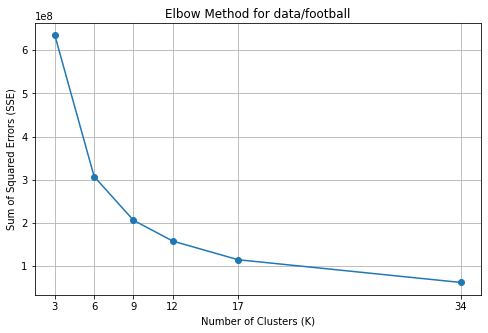

Processing image: data/sea-turtle-400x225.png
Running K-means for k = 3
Iterating...
Centroids have converged!

K = 3: Time = 0.16s, Iterations = 14
Running K-means for k = 6
Iterating...
Centroids have converged!

K = 6: Time = 0.57s, Iterations = 31
Running K-means for k = 9
Iterating...
Centroids have converged!

K = 9: Time = 1.21s, Iterations = 46
Running K-means for k = 12
Iterating...
Centroids have converged!

K = 12: Time = 1.28s, Iterations = 38
Running K-means for k = 17
Iterating...
Centroids have converged!

K = 17: Time = 1.86s, Iterations = 40
Running K-means for k = 34
Iterating...
Centroids have converged!

K = 34: Time = 12.83s, Iterations = 145


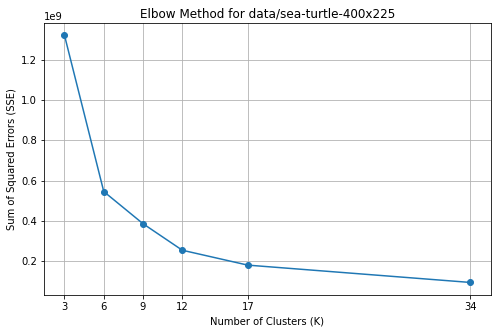

Processing image: data/tree.png
Running K-means for k = 3
Iterating...
Centroids have converged!

K = 3: Time = 0.19s, Iterations = 19
Running K-means for k = 6
Iterating...
Centroids have converged!

K = 6: Time = 1.08s, Iterations = 64
Running K-means for k = 9
Iterating...
Centroids have converged!

K = 9: Time = 2.21s, Iterations = 93
Running K-means for k = 12
Iterating...
Centroids have converged!

K = 12: Time = 2.20s, Iterations = 72
Running K-means for k = 17
Iterating...
Centroids have converged!

K = 17: Time = 5.91s, Iterations = 140
Running K-means for k = 34
Iterating...
Centroids have converged!

K = 34: Time = 11.38s, Iterations = 142


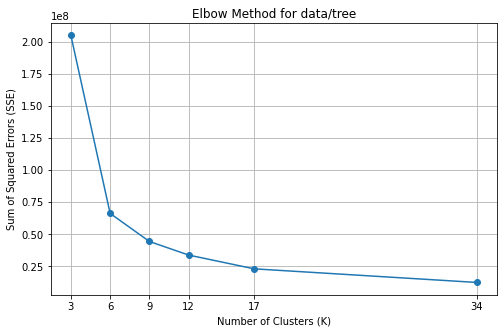

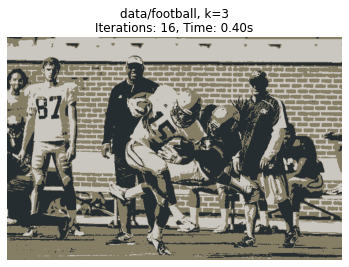

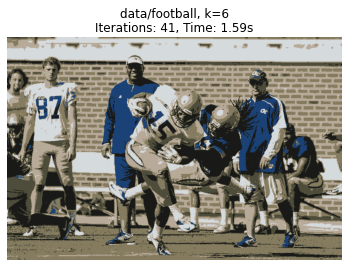

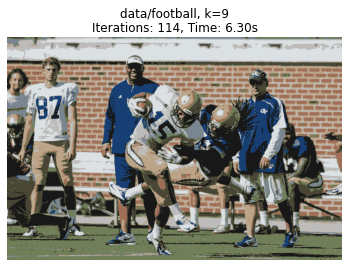

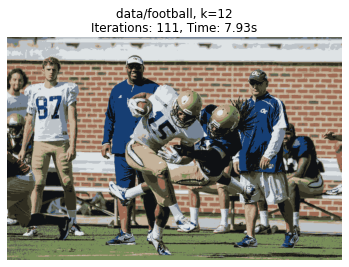

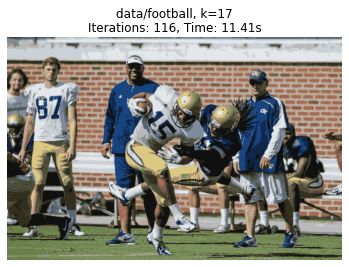

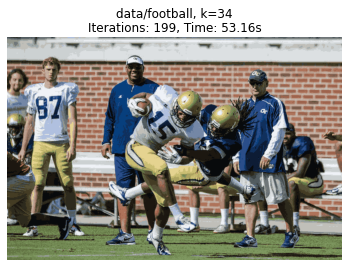

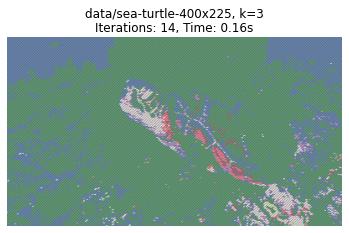

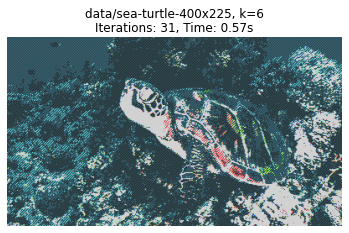

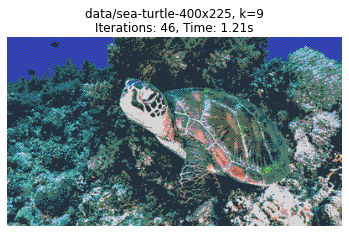

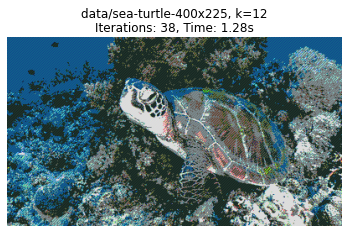

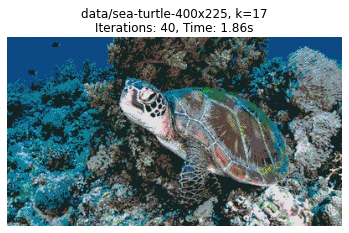

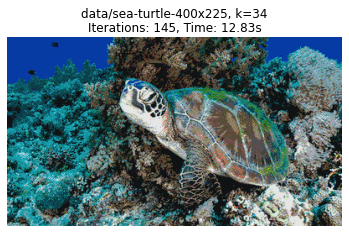

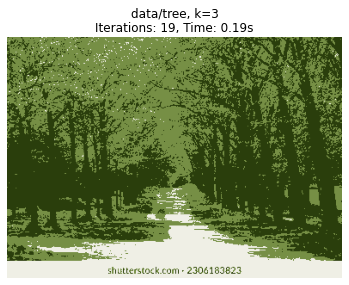

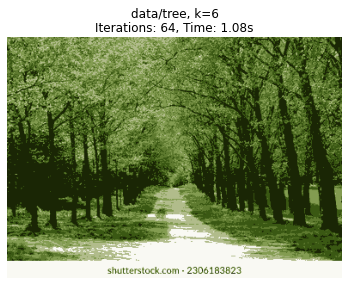

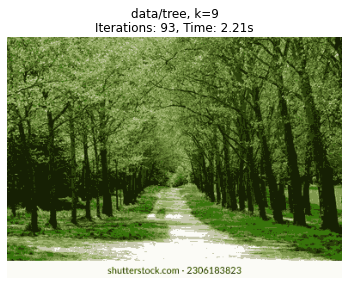

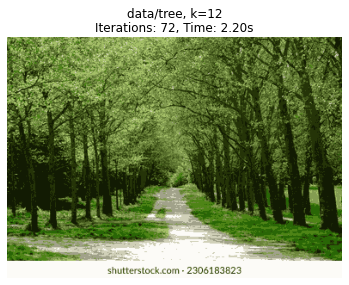

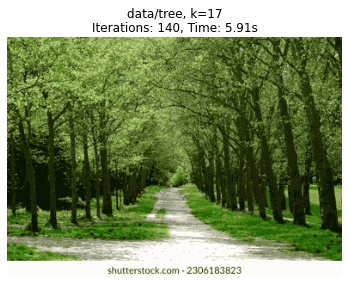

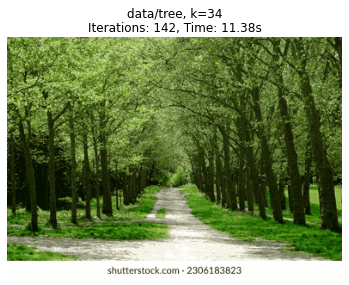

In [4]:
# NUM of clusters
k_values = [3,6,9,12,17,34]
sse_values = [] 
seed = 52 #for reproduceability
image_paths = ["data/football.bmp", "data/sea-turtle-400x225.png", "data/tree.png"]
tol = 1e-4  
results = []


#Above I'm able to choose how many clusters I would like the K-means to have


for image_path in image_paths:

    print(f"Processing image: {image_path}")   
    
    image = Image.open(image_path)
    image_array = np.array(image)
    flattened_array = image_array.reshape(-1, 3)
    
    #reset sse_values every iteratioan
    sse_values = []  
    for k in k_values:
        print(f"Running K-means for k = {k}")

        
        centroids = initialize_centroids(flattened_array, k)

        iterations = 0 #Represents how many iterations before convergesence
        start_time = time.time()
        
        print("Iterating...")
        while True:
            iterations += 1
            cluster_assignments = assign_pixels_to_clusters_l2(flattened_array, centroids)
            new_centroids = update_centroids(flattened_array, cluster_assignments, centroids)

            if check_convergence(centroids, new_centroids, tol):
                print("Centroids have converged!")
                print()
                centroids = new_centroids  # Final centroids
                break

            # Update centroids for the next iteration
            centroids = new_centroids

        #SSE calculation
        sse = calculate_sse(flattened_array, cluster_assignments, centroids)
        sse_values.append(sse)


        elapsed_time = time.time() - start_time
        
        compressed_image = replace_pixel_colors(cluster_assignments, centroids, image_array.shape)

        #conversion for nice display
        compressed_image = compressed_image.astype(np.uint8)

        results.append((image_path, k, compressed_image, iterations, elapsed_time))
        print(f"K = {k}: Time = {elapsed_time:.2f}s, Iterations = {iterations}")
        
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, sse_values, marker='o')
    plt.xticks(k_values)
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title(f"Elbow Method for {image_path.split('.')[0]}")
    plt.grid()
    plt.show()

# Visualize the images
for image_path, k, img, iterations, time_taken in results:
    """Sources:
    https://matplotlib.org/stable/users/index.html
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{image_path.split('.')[0]}, k={k}\nIterations: {iterations}, Time: {time_taken:.2f}s")
    plt.show()

## Question 3.2

Processing image: football.bmp
Running K-means for k = 3
Iterating...
Centroids have converged!

K = 3: Time = 0.20s, Iterations = 8
Running K-means for k = 6
Iterating...
Centroids have converged!

K = 6: Time = 3.24s, Iterations = 85
Running K-means for k = 9
Iterating...
Centroids have converged!

K = 9: Time = 2.63s, Iterations = 48
Running K-means for k = 12
Iterating...
Centroids have converged!

K = 12: Time = 5.35s, Iterations = 76
Running K-means for k = 17
Iterating...
Centroids have converged!

K = 17: Time = 2.63s, Iterations = 27
Running K-means for k = 34
Iterating...
Centroids have converged!

K = 34: Time = 26.28s, Iterations = 98


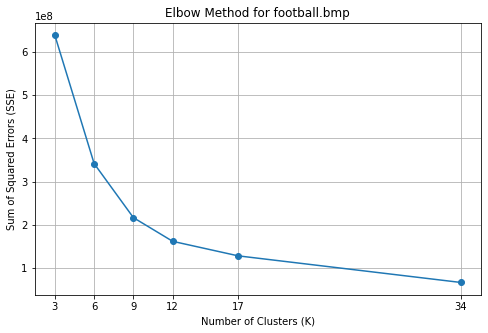

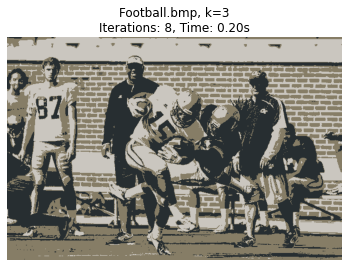

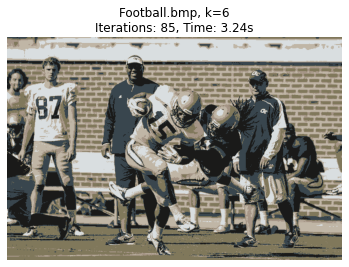

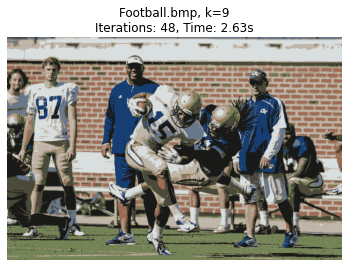

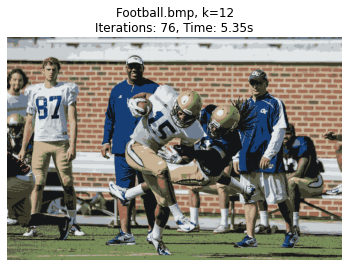

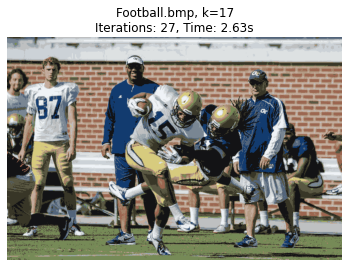

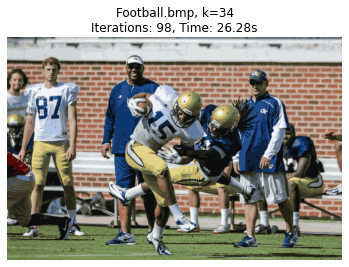

In [6]:
k_values = [3,6,9,12,17,34] # Number of clusters
seed = 52 #for reproduceability
tol = 1e-4 
results = []  
sse_values = []  

print(f"Processing image: football.bmp")   

image_path = "data/football.bmp"
image = Image.open(image_path)
image_array = np.array(image)
flattened_array = image_array.reshape(-1, 3)

for k in k_values:
    print(f"Running K-means for k = {k}")

    # Initialize centroids
    centroids = initialize_centroids(flattened_array, k)

    iterations = 0  # Count iterations until convergence
    start_time = time.time()

    print("Iterating...")
    while True:
        iterations += 1
        #using Manhattan distance here
        cluster_assignments = assign_pixels_to_clusters_l1(flattened_array, centroids)
        # Update centroids
        new_centroids = update_centroids(flattened_array, cluster_assignments, centroids)

        # Check for convergence
        if check_convergence(centroids, new_centroids, tol):
            print("Centroids have converged!")
            print()
            centroids = new_centroids  # Final centroids
            break

        # Update centroids for the next iteration
        centroids = new_centroids

    elapsed_time = time.time() - start_time

    # Calculate SSE for the current k
    sse = calculate_sse(flattened_array, cluster_assignments, centroids)
    sse_values.append(sse)
    
    compressed_image = replace_pixel_colors(cluster_assignments, centroids, image_array.shape)
    compressed_image = compressed_image.astype(np.uint8)  # Ensure proper display

    results.append((k, compressed_image, iterations, elapsed_time))
    print(f"K = {k}: Time = {elapsed_time:.2f}s, Iterations = {iterations}")

    
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse_values, marker='o')
plt.xticks(k_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for football.bmp")
plt.grid()
plt.show()    
    
for k, img, iterations, time_taken in results:
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Football.bmp, k={k}\nIterations: {iterations}, Time: {time_taken:.2f}s")
    plt.show()